## **Human Face Detection and  Image Pre-processing basics using OpenCV**

Welcome to the notebook on counting human faces in an image using OpenCV.
Here we will write an OpenCV program that will detect human faces in the image and count total number of humans present in any image by using the head count.

In [ ]:
import cv2
from google.colab.patches import cv2_imshow # for showing the images on colab

**Creating a classifier using haarcascade xml files.**
The haarcascade files contains the features of the image to be used to get the location of the face. The CascadeClassifier takes help of features called haar features (like edge features, line features and some center surround features)which are the input to the classifier for face detection. Instead of applying all the features on the image, the features are grouped into different stages and apply them one by one on differenrt section of the image. If a particular section is unable to pass the a particular stage, it is discarded or if it passes the stage, the next stage filters is applied on the image by the classifier. The  section of the image that passed all the stages is the face region in the window. 
So all the stages are there in the XML file.
So openCV contains already pre-trained classifier for classifying eyes, face which takes use of these xml files to detect the particular region we are interested in.

We can download cascade files from [here](https://github.com/opencv/opencv/tree/master/data/haarcascades).

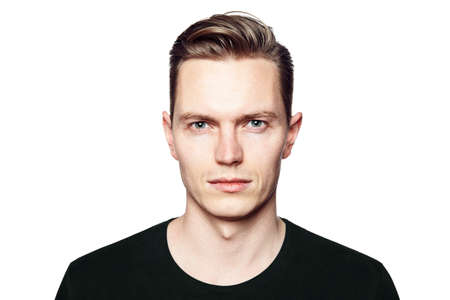

In [ ]:
face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
img = cv2.imread("/content/human.jpg")
cv2_imshow(img)

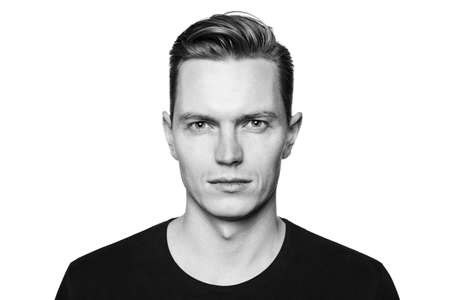

In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
cv2_imshow(gray)

**Uisng OpenCV classifier that we just defined above to get the co-ordinates of the human face in the image.** (Taking top right corner as origin) and downward direction as +ve y axis and right direction as +ve x-axis.

In [ ]:
faces = face_cascade.detectMultiScale(gray)
print(faces)

[[155  67 148 148]]


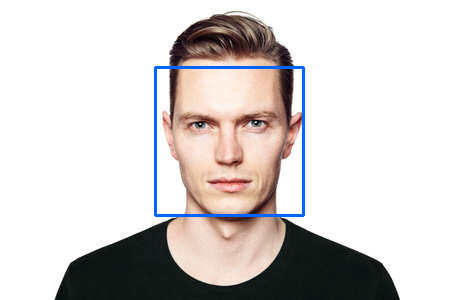

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x+w, y+h), (255, 100, 0), 2)
# Display the output
cv2_imshow(img)

To use the cam using the openCV, the code written in the below cell is used.<br>
But however google colab being an online service has it's own limitation and thus does not support the following code.

<hr>
Now let's use try harrcascade features to detect human eye in an image.

[[166  90  43  43]
 [220  93  37  37]]


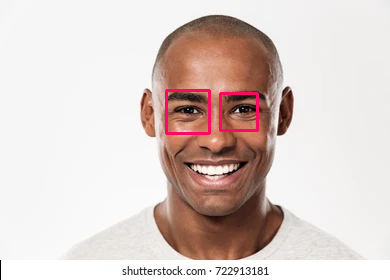

In [ ]:
eye_cascade = cv2.CascadeClassifier('/content/haarcascade_eye.xml')
img = cv2.imread("/content/human pic.webp")
gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
eyes = eye_cascade.detectMultiScale(gray)
print(eyes)
for (x, y, w, h) in eyes:
    cv2.rectangle(img, (x, y), (x+w, y+h), (100, 10, 250), 2)
# Display the output
cv2_imshow(img)

**It's not wise to write the whole code again and again to detect the human face and human eyes**

So better make a function and pass the image_path to the function as the parameter and let the function detect the human face in the image.

In [ ]:
def fun_to_detect(img_path):
  face_cascade = cv2.CascadeClassifier('/content/haarcascade_frontalface_default.xml')
  img = cv2.imread(img_path)
  gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
  faces = face_cascade.detectMultiScale(gray)
  for (x, y, w, h) in faces:
      cv2.rectangle(img, (x, y), (x+w, y+h), (100, 10, 250), 2)
  # Display the output
  cv2_imshow(img)

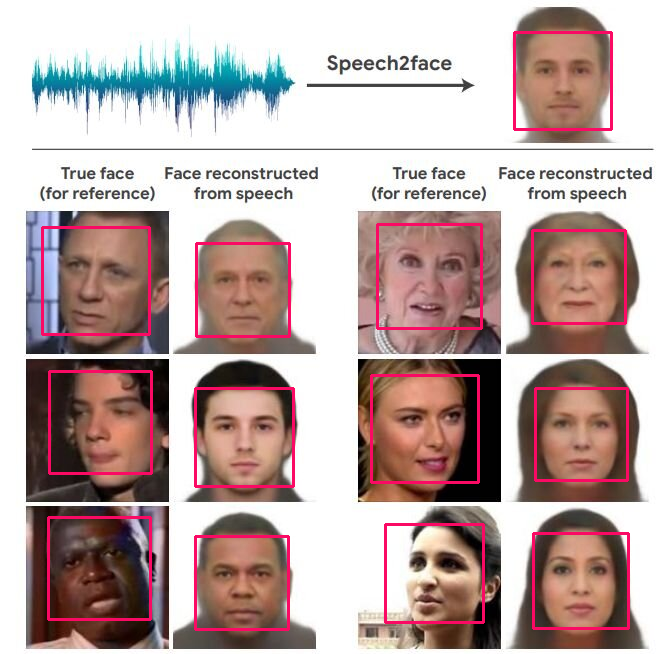

In [ ]:
img_path = "/content/5d020eb457ae2.jpg"

fun_to_detect(img_path)

### **Applying edge filters on the human face detected using OpenCV**

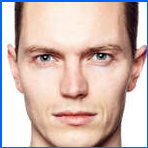

In [ ]:
# CROPPING THE FACE PART OF THE IMAGE

# LET'S JUST UDE A SINGLE FACE ONLY FOR THE SIMPLICITY OUT OF ALL THE HUMAN FACES PRESET IN THE IMAGE

cropped_img = img[faces[0][1]:faces[0][1]+faces[0][3], faces[0][0]:faces[0][0]+faces[0][2]]
cv2_imshow(cropped_img)

#### **Let's try applying the edge filters to the image**

We will use the technique called [sobel filters](https://automaticaddison.com/how-the-sobel-operator-works/) to detect the horizontal and vertical edges in the image.

<b>1. Get vertical edges</b>

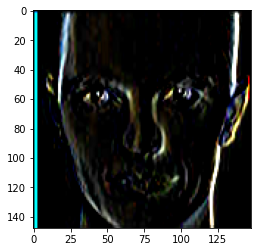

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sobel_y = np.array([[ -1, 0, 1], 
                   [ -1, 0, 1], 
                   [ -1, 0, 1]])

filtered_image = cv2.filter2D(cropped_img, -1, sobel_y)

plt.imshow(filtered_image)

**Stronger vertical edge**

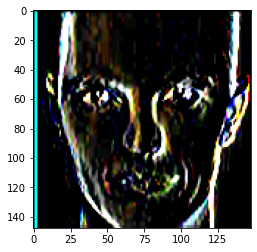

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sobel_y = np.array([[ -3, 0, 3], 
                   [ -3, 0, 3], 
                   [ -3, 0, 3]])

filtered_image = cv2.filter2D(cropped_img, -1, sobel_y)

plt.imshow(filtered_image)

<b>1. Get horizontal edges</b>

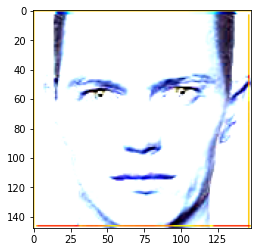

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sobel_y = np.array([[ -1, -1, 1], 
                   [ 0, 0, 0], 
                   [ 1, 1, 1]])

filtered_image = cv2.filter2D(cropped_img, -1, sobel_y)

plt.imshow(filtered_image)

**Stronger horizontal edges**

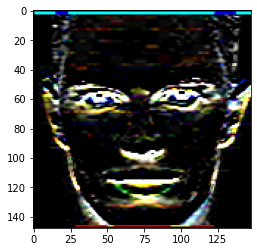

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

sobel_y = np.array([[ -3, -3, -3], 
                   [ 0, 0, 0], 
                   [ 3, 3, 3]])

filtered_image = cv2.filter2D(cropped_img, -1, sobel_y)

plt.imshow(filtered_image)

##### **Rotating an Image**

Image rotation is an important part of **data augmentation**. Data Augmentation is generally used to increase the dataset by repeating the image in the dataset after adding some disturbance from the original or to increase the randomness in the dataset.

To rotate the image we use an OpenCV function called <u>getRotationMatrix2D</u>.


```
cv2.getRotationMatrix2D(center, angle, scale)

```
- Center is the center point of rotation
- Angle is anlge in degress by which we want to rotate the image (counter-clockwise).
- Sclae is the scale property which makes the image fit on the screen.

In [ ]:
height, width = cropped_img.shape[0:2]

rotationMatrix = cv2.getRotationMatrix2D((width//2, height//2), 45, 0.6)

Now we have the rotated matrix of the image, now it's time to rotate the image. For that we use cv2 method named <u>wrapAffine</u> which takes the original image, the rotation matrix of the image and the width and height of the image as arguments.

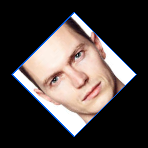

In [ ]:
rotated_img = cv2.warpAffine(cropped_img, rotationMatrix, (width, height))
cv2_imshow(rotated_img)

##### **Resizing an Image**

Resizing an image means changing the size of the original image into the required size. It's very important step in image pre-processing. As while training any model, we need all the image of to be same size which might not be the case with our dataset. So we always resize  the image to a particular size before passing it to the model either for training or testing.

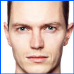

In [ ]:
# Resizing the image using Axis values:

resized_img = cv2.resize(cropped_img, (0,0), fx=0.50, fy=0.50)

cv2_imshow(resized_img)

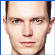

In [ ]:
# Resizing the image using rows and columns values:

resized_img = cv2.resize(cropped_img, (55, 55))

cv2_imshow(resized_img)

#### **Detecting Edges without custom filters**

We can use OpenCV's Canny function to detect edges in any image

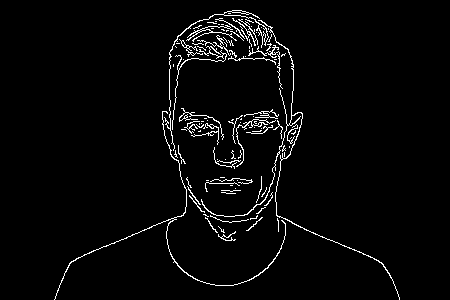

In [ ]:
edge_img = cv2.Canny(cropped_img,100,200)
cv2_imshow(edge_img)

These were some basic and most common image pre-processing techniques which are generally used before training any model.